#### Random Forest Model

In [13]:
%reload_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from src.paths import TRANSFORMED_DATA_DIR
from src.split_and_tfidf import split_and_vect
from src.stemming_and_lemming import stem_reviews, get_wordnet_pos, lemmatize_reviews

In [3]:
# bring in data
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


In [4]:
df_copy = df.copy()

In [ ]:
# split the data and fit a tfidf vectorizer to it
X_train_vec, X_test_vec, y_train, y_test, tfidf_vec = split_and_vect(df_copy, 'cleaned', 'recommended')

In [7]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier()

# fit to training data
rf.fit(X_train_vec, y_train)

# make predictions
y_pred = rf.predict(X_test_vec)

In [9]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       503
           1       0.86      0.81      0.83       276

    accuracy                           0.88       779
   macro avg       0.88      0.87      0.87       779
weighted avg       0.88      0.88      0.88       779



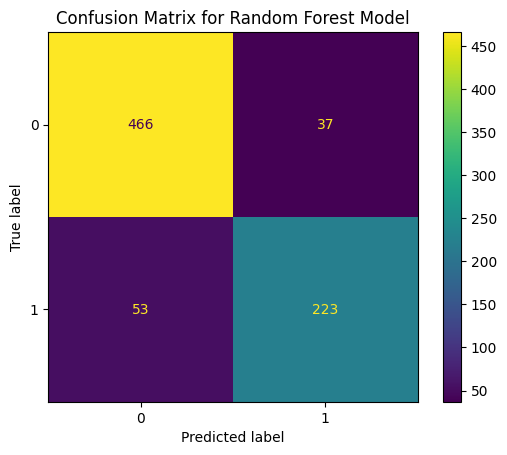

In [11]:
# display
ConfusionMatrixDisplay.from_estimator(rf, X_test_vec, y_test)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Stemming

In [14]:
# stemming
df_stem = df.copy()

# perform stemming on the data
df_stem['stemmed'] = stem_reviews(df_stem['cleaned'])

In [15]:
# split and vectorize
X_train_stem, X_test_stem, y_train, y_test, tfidf_stem_vec = split_and_vect(df_stem, 'stemmed', 'recommended')

# fit stemmed to sgd
# instantiate
rf_stem = RandomForestClassifier()

# fit to the data
rf_stem.fit(X_train_stem, y_train)

# make predictions
y_pred_stem = rf_stem.predict(X_test_stem)

In [16]:
print(classification_report(y_test, y_pred_stem))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       503
           1       0.86      0.81      0.84       276

    accuracy                           0.89       779
   macro avg       0.88      0.87      0.87       779
weighted avg       0.89      0.89      0.89       779



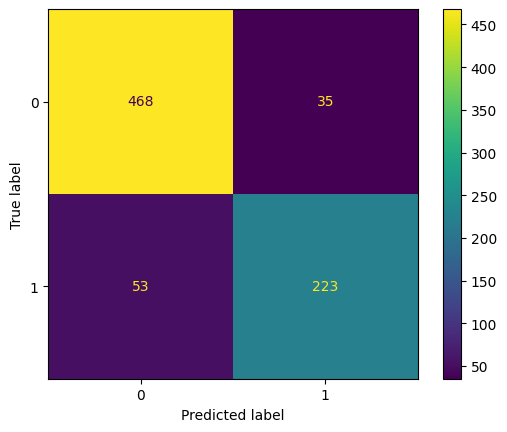

In [17]:
ConfusionMatrixDisplay.from_estimator(rf_stem, X_test_stem, y_test)

#### Lemmatizing

Lemmatizing has not made any of our models better at this point, we can conclude that it is not the best route for our data.

In [18]:
# make a copy of the data
df_lemm = df.copy()

df_lemm['lemmatized'] = lemmatize_reviews(df['cleaned'])
df_lemm.head()

,recommended,cleaned,lemmatized
0,1,Very good flight following an equally good fli...,Very good flight follow an equally good flight...
1,1,An hours delay due to late arrival of the inco...,An hour delay due to late arrival of the incom...
2,0,I booked through BA because Loganair dont have...,I book through BA because Loganair dont have r...
3,0,British airways lost bags in LHR then found th...,British airway lose bag in LHR then find them ...
4,0,The check in process and reward loyalty progra...,The check in process and reward loyalty progra...


In [19]:
# split lemmatized data
X_train_lem, X_test_lem, y_train, y_test, tfidf_lem = split_and_vect(df_lemm, 'lemmatized', 'recommended')

# sgd classifier
rf_lem = RandomForestClassifier()

# fit
rf_lem.fit(X_train_lem, y_train)

# predict
y_pred_lem = rf_lem.predict(X_test_lem)

# classification report
print(classification_report(y_test, y_pred_lem))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       503
           1       0.79      0.64      0.71       276

    accuracy                           0.81       779
   macro avg       0.81      0.77      0.78       779
weighted avg       0.81      0.81      0.81       779



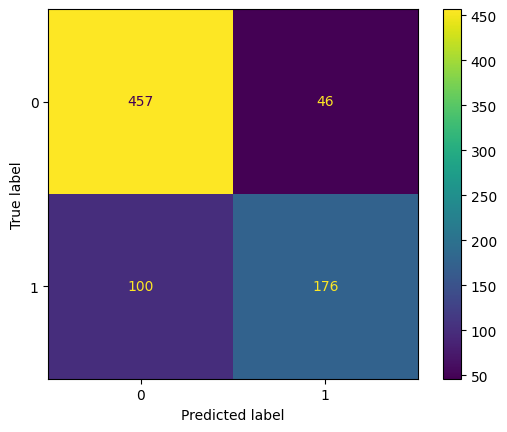

In [20]:
ConfusionMatrixDisplay.from_estimator(rf_lem, X_test_lem, y_test)